In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
import mne
from mne import io
import numpy as np

In [2]:
mne.set_log_level('WARNING')

In [8]:
data_path = '/neurospin/meg/meg_tmp/Realtime_Fosca_2016/data/raw/sm_110254/'
raw_fname = data_path + 'raw.fif'


In [10]:
raw = mne.io.read_raw_fif(raw_fname, preload=True)

ValueError: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data. Use allow_maxshield=True if you are sure you want to load the data despite this warning.

In [5]:
raw

NameError: name 'raw' is not defined

In [16]:
events = mne.find_events(raw, stim_channel='STI101')
#events = mne.find_events(raw, stim_channel='STI101', min_duration=1)

Trigger channel contains negative values. Taking absolute value.


ValueError: You have 1 events shorter than the shortest_event. These are very unusual and you may want to set min_duration to a larger value e.g. x / raw.info['sfreq']. Where x = 1 sample shorter than the shortest event length.

In [14]:
events

y = np.bincount(events[:,2])
ii = np.nonzero(y)[0]


In [15]:
zip(ii,y[ii]) 

[]

In [77]:
ica = mne.preprocessing.ICA()
ica.fit(raw)

/usr/lib/python2.7/dist-packages/sklearn/decomposition/fastica_.py:110: UserWarning: FastICA did not converge. You might want to increase the number of iterations.
  ' to increase the number of iterations.')


<ICA  |  raw data decomposition, fit (fastica): 580000 samples, 306 components, channels used: "mag"; "grad">

In [78]:
raw.info['projs']

<Info | 29 non-empty fields
    acq_pars : unicode | 20857 items
    bads : list | 0 items
    buffer_size_sec : numpy.float64 | 1.0
    ch_names : list | MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, ...
    chs : list | 324 items (ECG: 1, STIM: 3, EOG: 2, MISC: 12, MAG: 102, GRAD: 204)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : unicode | 32 items
    dev_head_t : 'mne.transforms.Transform | 3 items
    dig : list | 109 items
    events : list | 1 items
    experimenter : unicode | 6 items
    file_id : dict | 4 items
    filename : str | /neurospin.../calc10_raw_sss.fif
    highpass : float | 0.10000000149
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    hpi_subsystem : dict | 2 items
    line_freq : float | 50.0
    lowpass : float | 330.0
    meas_date : numpy.ndarray | 2015-02-17 14:44:10
    meas_id : dict | 4 items
    nchan : int | 324
    proc_history : list | 2 items
    proj_id : numpy.ndarray | 1 items
    pr

In [70]:
epochs = mne.Epochs(raw, events, event_id=4, tmin=-0.1, tmax=0.8, baseline=(-0.1,0))

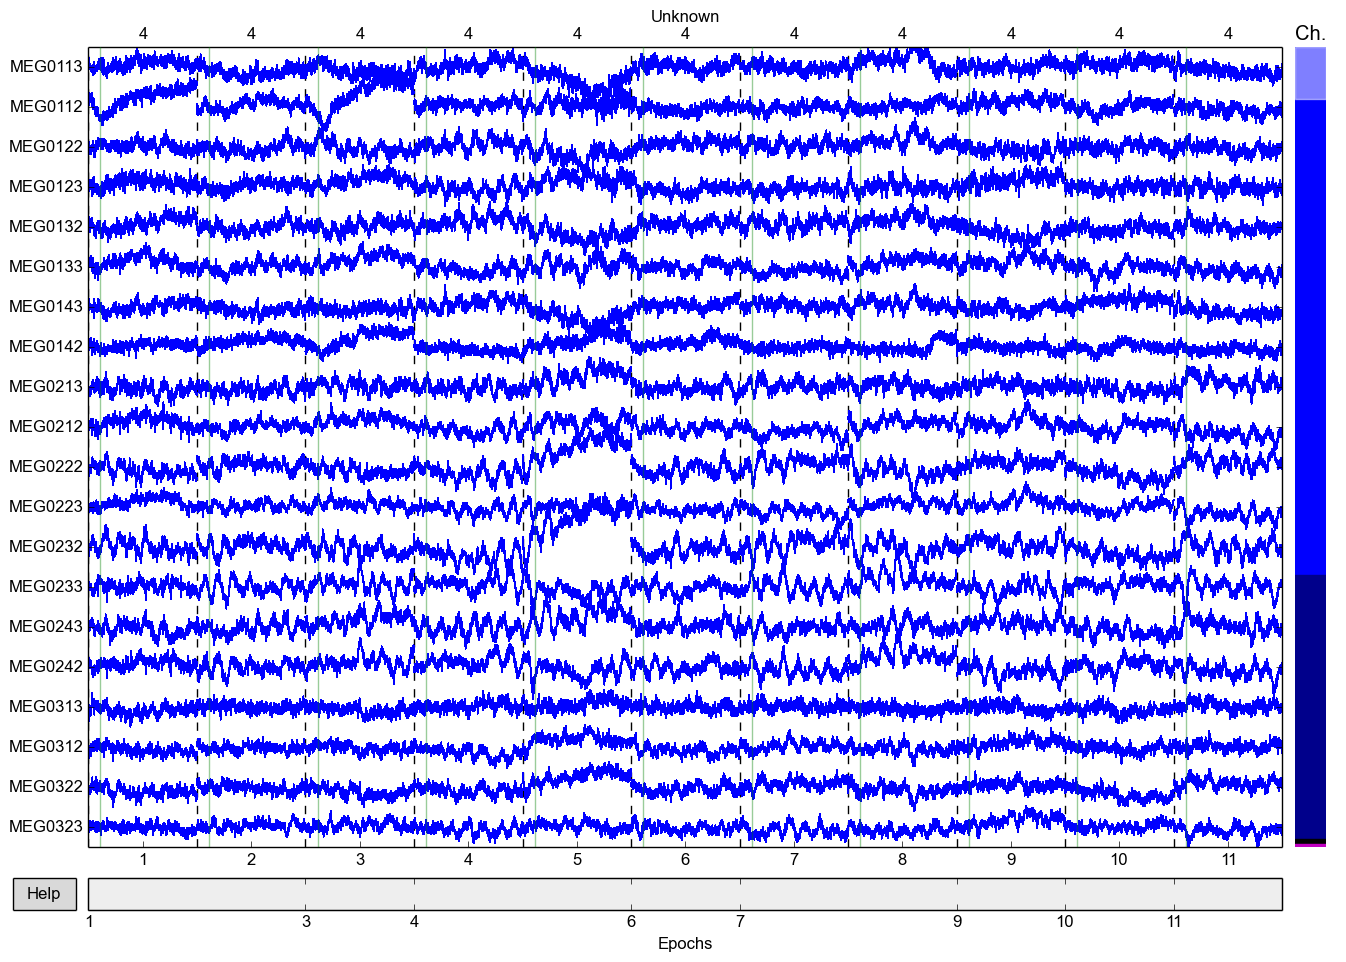

In [72]:
epochs.plot()

In [73]:
evoked = epochs.average()

/usr/lib/pymodules/python2.7/matplotlib/figure.py:1595: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


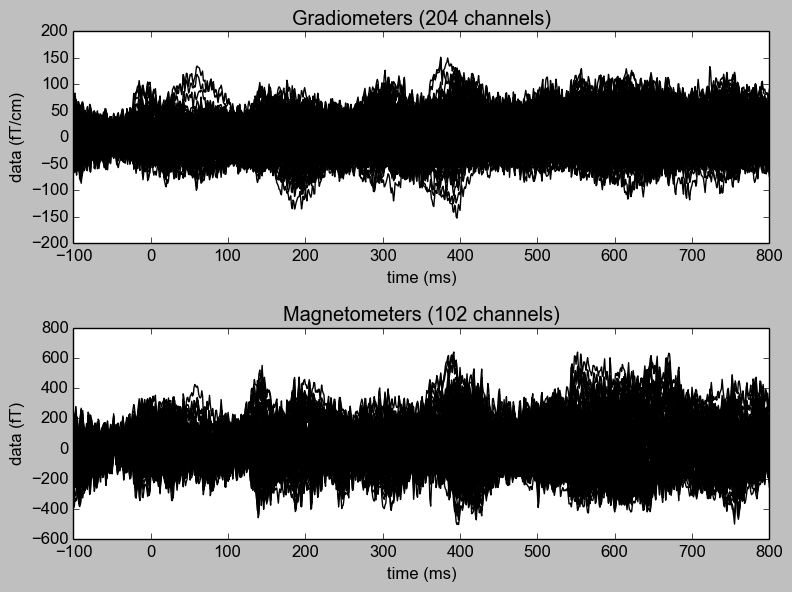

In [74]:
evoked.plot()

In [8]:
[In[x].split('\n') for x in range(1,5)]

[[u'from __future__ import print_function',
  u'from matplotlib import pyplot as plt',
  u'import mne',
  u'from mne import io',
  u'import numpy as np'],
 [u"mne.set_log_level('WARNING')"],
 [u"data_path = '/neurospin/meg/meg_tmp/Calculation_Pedro_2014/data/sss/s01/'",
  u"raw_fname = data_path + 'calc10_raw_sss.fif'"],
 [u'raw = io.Raw(raw_fname)']]